In [2]:

# from google.colab import drive

# drive.mount('/content/gdrive')
# %cd /content/gdrive/MyDrive/SER_Capstone/




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/SER_Capstone


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import soundfile as sf

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import os
import random
import sys

import librosa
import librosa.display

from scipy import signal 



import IPython.display as ipd


# import keras
# from keras import layers
# from keras.preprocessing.image import ImageDataGenerator
# from keras.layers import Dense
# from keras.models import Model
# from keras.metrics import Recall
# from tensorflow.keras.optimizers import Adam 
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras import models, layers

import os
import glob
import shutil


import pickle


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [2]:
Emo_path = 'EmoV-DB_sorted/'
emo_actor_list = os.listdir(Emo_path) 
emo_actor_list.sort

file_actor = []
file_emotion = []
file_path = []

for dir in emo_actor_list:
    if dir.startswith('.'):
        pass
    else:
        actor = os.listdir(Emo_path + dir) 
    
        for emotions in actor:
            if emotions.startswith('.'):
                pass
            else:
                 
                emotion = os.listdir(Emo_path + dir + '/' + emotions) 
                for file in emotion:
                    if file.startswith('.'):
                        pass
                    else:
                        file_emotion.append(emotions.lower())
                        file_path.append(Emo_path + dir + '/' + emotions  + '/' + file)
                        file_actor.append(dir)
     

In [3]:
print(f'Number of file paths: {len(file_path)},\
      Number of emotions listed: {len(file_emotion)},\
      Number of actors listed: {len(file_actor)}')

Number of file paths: 6893,      Number of emotions listed: 6893,      Number of actors listed: 6893


In [4]:
df = pd.DataFrame({"file_path" : file_path, "actor" : file_actor})
df["sex"] = df["actor"].apply(lambda x: "female" if x in ["jenie", "bea"] else 'male')
df["emotion"] = (file_emotion)

df

,file_path,actor,sex,emotion
0,EmoV-DB_sorted/sam/Amused/sam_amused_00058.wav,sam,male,amused
1,EmoV-DB_sorted/sam/Amused/sam_amused_00064.wav,sam,male,amused
2,EmoV-DB_sorted/sam/Amused/sam_amused_00070.wav,sam,male,amused
3,EmoV-DB_sorted/sam/Amused/sam_amused_00299.wav,sam,male,amused
4,EmoV-DB_sorted/sam/Amused/sam_amused_00266.wav,sam,male,amused
...,...,...,...,...
6888,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00154.wav,josh,male,sleepy
6889,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00140.wav,josh,male,sleepy
6890,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00168.wav,josh,male,sleepy
6891,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00197.wav,josh,male,sleepy


### Creating a Larger Dataset with Randomized Filtering (Maybe? If I have Time )
#### Will come back to this for a more polished final product

#### 1 will add noise to many  randomized files (in random amounts but not enough to drown out speech)
#### 2 Randomly pitch up/ down data by a variable percentage (again not enough to make incomprehensible)
#### 3 Speed up/slow down (while maintaining pitch) by up to 50%
#### Can do a few pass-throughs of dataset 
#### Randomly assign 1,2, 3 or a combination to a file 


## Come back to this in the future (after MVP or after )

### Increase Dataset with new data to train on with augmented data - (add noise) add more diverse voices/accents

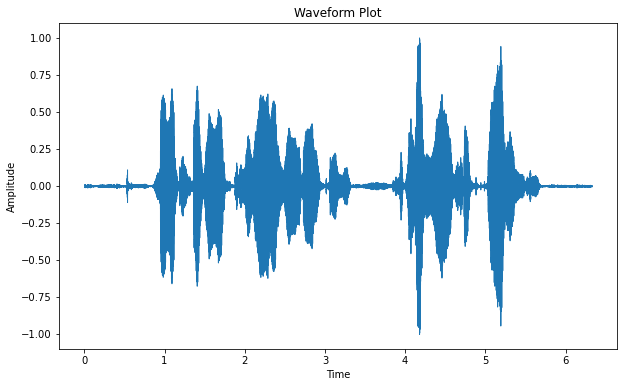

In [5]:
file_name='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)
fig, ax = plt.subplots(figsize=(10,6))
librosa.display.waveshow(audio_data,sr=sampling_rate)
# ipd.Audio(file_name)
ax.set(title='Waveform Plot', ylabel='Amplitude')
ax.label_outer();
# plt.savefig('img/waveforms/sam_amused_00003.wav')





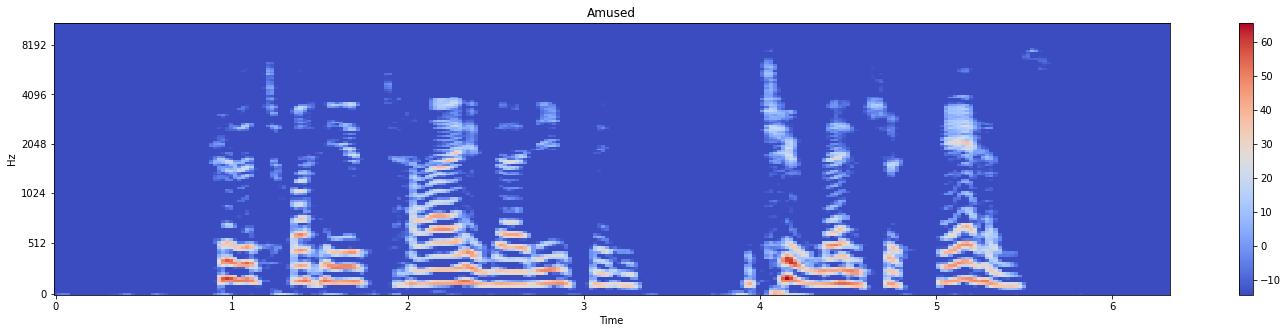

In [48]:
# Creating A basic Mel Spectrogram from our audio sample above 
spectrogram = librosa.feature.melspectrogram(audio_data)
s_db = librosa.amplitude_to_db(spectrogram)
fig, ax = plt.subplots(figsize=(25, 5))

amuse = librosa.display.specshow(s_db, sr=sampling_rate, x_axis='time', y_axis='mel', ax=ax)
ax.set(title="Amused")
fig.colorbar(amuse, ax=ax);
##plt.savefig('file/path')

## EDA Visuals

In [7]:
df.emotion.value_counts()

sleepy       1721
neutral      1568
amused       1317
angry        1268
disgusted    1019
Name: emotion, dtype: int64

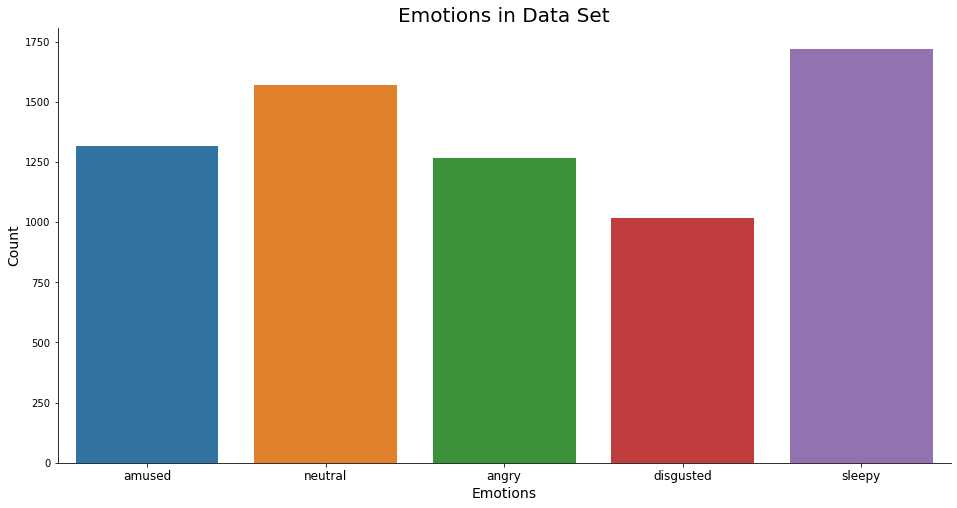

In [8]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(df.emotion)
plt.title('Emotions in Data Set', size=20)
plt.ylabel('Count', size=14)
plt.xlabel('Emotions', size=14)
plt.xticks(size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
# plt.savefig('img/plots/Emotion_count')
plt.show()

sam      2453
jenie    1790
bea      1787
josh      863
Name: actor, dtype: int64


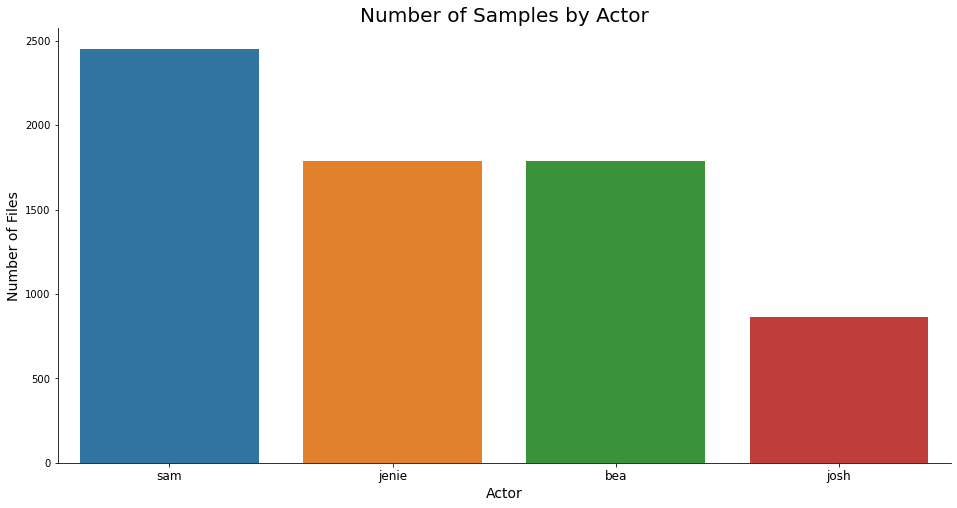

In [9]:
print(df.actor.value_counts())

fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(df.actor)
plt.title('Number of Samples by Actor', size=20)
plt.ylabel('Number of Files', size=14)
plt.xlabel('Actor', size=14)
plt.xticks(size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
# plt.savefig('img/plots/Actor_count')
plt.show()

female    3577
male      3316
Name: sex, dtype: int64


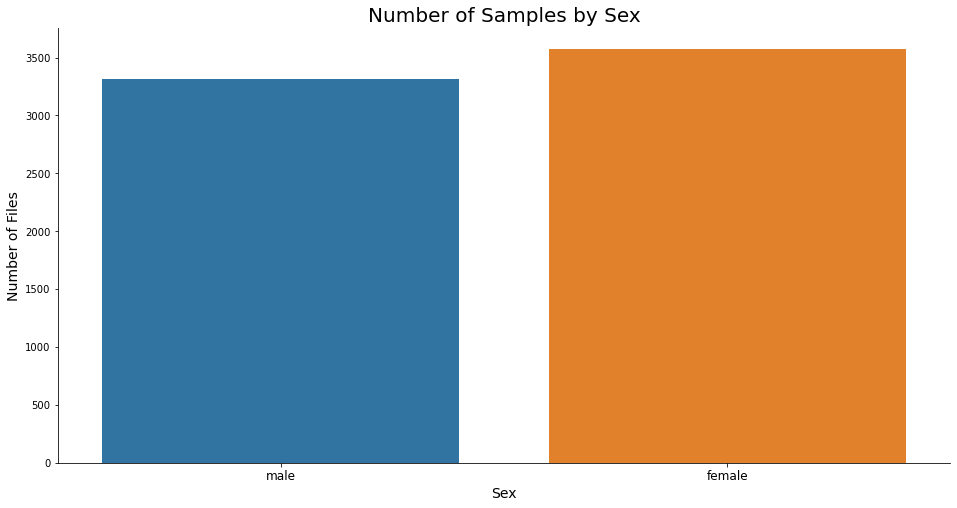

In [10]:
print(df.sex.value_counts())

fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(df.sex)
plt.title('Number of Samples by Sex', size=20)
plt.ylabel('Number of Files', size=14)
plt.xlabel('Sex', size=14)
plt.xticks(size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
# plt.savefig('img/plots/sex_count')
plt.show()

In [11]:
df


,file_path,actor,sex,emotion
0,EmoV-DB_sorted/sam/Amused/sam_amused_00058.wav,sam,male,amused
1,EmoV-DB_sorted/sam/Amused/sam_amused_00064.wav,sam,male,amused
2,EmoV-DB_sorted/sam/Amused/sam_amused_00070.wav,sam,male,amused
3,EmoV-DB_sorted/sam/Amused/sam_amused_00299.wav,sam,male,amused
4,EmoV-DB_sorted/sam/Amused/sam_amused_00266.wav,sam,male,amused
...,...,...,...,...
6888,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00154.wav,josh,male,sleepy
6889,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00140.wav,josh,male,sleepy
6890,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00168.wav,josh,male,sleepy
6891,EmoV-DB_sorted/josh/Sleepy/josh_sleepy00197.wav,josh,male,sleepy


# We will now remove any silence in the begining and end of the audio clips and save these new files to the folder trimmed_audio

In [12]:
def the_trimmer(path):
    
    path_stripped = os.path.basename(path).strip(".wav")

    audio_data_test, sampling_rate_test = librosa.load(path)
    audio_data_test2, index = librosa.effects.trim(audio_data_test, top_db = 30.0 )
    
    
    sf.write(f'trimmed_audio/{path_stripped}.wav', audio_data_test2, sampling_rate_test, format='wav')


In [13]:
# df["file_path"].apply(lambda x: the_trimmer(x))

##Commented out as not to affect future runs


# Now that we have trimmed our silence we will log all paths in this folder

In [14]:
pathway = 'trimmed_audio/'
path_list = os.listdir(pathway) 



file_path_trimmed = []

for file in path_list:
    if file.startswith('.'):
        pass
    else:
        file_path_trimmed.append(pathway + file)
     

In [15]:
file_path_trimmed

['trimmed_audio/jenie_anger_00105.wav',
 'trimmed_audio/sam_disgust_00189.wav',
 'trimmed_audio/bea_amused_00234.wav',
 'trimmed_audio/sam_sleepy_00408.wav',
 'trimmed_audio/bea_amused_00220.wav',
 'trimmed_audio/sam_angry_00358.wav',
 'trimmed_audio/jenie_anger_00111.wav',
 'trimmed_audio/bea_angry_00238.wav',
 'trimmed_audio/jenie_anger_00139.wav',
 'trimmed_audio/jenie_sleepy_00397.wav',
 'trimmed_audio/sam_angry_00416.wav',
 'trimmed_audio/bea_angry_00210.wav',
 'trimmed_audio/jenie_disgusted_00097.wav',
 'trimmed_audio/jenie_neutral_00043.wav',
 'trimmed_audio/bea_disgusted_00256.wav',
 'trimmed_audio/sam_sleepy_00352.wav',
 'trimmed_audio/sam_sleepy_00434.wav',
 'trimmed_audio/josh_amused00223.wav',
 'trimmed_audio/jenie_amused_00062.wav',
 'trimmed_audio/bea_amused_00208.wav',
 'trimmed_audio/sam_angry_00370.wav',
 'trimmed_audio/sam_neutral_00298.wav',
 'trimmed_audio/sam_angry_00364.wav',
 'trimmed_audio/sam_sleepy_00420.wav',
 'trimmed_audio/josh_amused00237.wav',
 'trimmed_a

In [16]:
len(file_path_trimmed)

6733

In [17]:
trimmed_audio_df = pd.DataFrame(file_path_trimmed, columns = {"trimmed_paths"} )
trimmed_audio_df

,trimmed_paths
0,trimmed_audio/jenie_anger_00105.wav
1,trimmed_audio/sam_disgust_00189.wav
2,trimmed_audio/bea_amused_00234.wav
3,trimmed_audio/sam_sleepy_00408.wav
4,trimmed_audio/bea_amused_00220.wav
...,...
6728,trimmed_audio/bea_angry_00235.wav
6729,trimmed_audio/sam_angry_00433.wav
6730,trimmed_audio/bea_disgusted_00273.wav
6731,trimmed_audio/sam_sleepy_00377.wav


## We can now cut the data up into 2 second clips for easier workablitiy

In [20]:
def the_chopper(path):
    path_stripped = os.path.basename(path).strip(".wav")
    data, sr = sf.read(path)
    split = []
    noSections = int(np.ceil(len(data) / sr))

    for i in range(noSections):
        temp = data[i*sr:i*sr + sr*2] 
        split.append(temp)
    

    for i in range(noSections)[::2]:
        filename = f"chopped_wavs/{path_stripped}_chopped{i}.wav"
        sf.write(filename, split[i], sr)
 
      

In [21]:
# trimmed_audio_df["trimmed_paths"].apply(lambda x: the_chopper(x))

##Commented out as not to affect future runs


In [24]:
pathway = 'chopped_wavs/'
pathway_to_files = os.listdir(pathway) 


file_path_chop = []

for file in pathway_to_files:
    if file.startswith('.'):
        pass
    else:
        file_path_chop.append(pathway + file)
    
        
     

In [25]:
len(file_path_chop)

16833

In [26]:
chopped_audio_df = pd.DataFrame(file_path_chop, columns = {"chopped_paths"} )
chopped_audio_df

,chopped_paths
0,chopped_wavs/sam_neutral_00400_chopped0.wav
1,chopped_wavs/bea_sleepy_00027_chopped0.wav
2,chopped_wavs/josh_sleepy00005_chopped2.wav
3,chopped_wavs/bea_amused_00289_chopped0.wav
4,chopped_wavs/jenie_sleepy_00157_chopped0.wav
...,...
16828,chopped_wavs/sam_sleepy_00386_chopped0.wav
16829,chopped_wavs/jenie_sleepy_00164_chopped0.wav
16830,chopped_wavs/bea_disgusted_00269_chopped2.wav
16831,chopped_wavs/sam_amused_00128_chopped0.wav


In [27]:
X_train, X_test = train_test_split(chopped_audio_df["chopped_paths"], test_size=0.25, random_state=42, shuffle = True)


In [28]:
X_train_df = pd.DataFrame(X_train, columns = {"chopped_paths"} )
X_test_df = pd.DataFrame(X_test, columns = {"chopped_paths"} )


In [29]:
X_train_df

,chopped_paths
6840,chopped_wavs/sam_sleepy_00401_chopped6.wav
10144,chopped_wavs/bea_amused_00066_chopped0.wav
7592,chopped_wavs/bea_sleepy_00372_chopped4.wav
2412,chopped_wavs/sam_angry_00243_chopped2.wav
9707,chopped_wavs/bea_sleepy_00430_chopped6.wav
...,...
11284,chopped_wavs/sam_disgust_00370_chopped2.wav
11964,chopped_wavs/sam_sleepy_00421_chopped6.wav
5390,chopped_wavs/sam_amused_00117_chopped0.wav
860,chopped_wavs/jenie_amused_00084_chopped0.wav


In [30]:
X_test_df

,chopped_paths
1302,chopped_wavs/jenie_sleepy_00103_chopped4.wav
736,chopped_wavs/sam_neutral_00415_chopped0.wav
10359,chopped_wavs/jenie_neutral_00181_chopped0.wav
4625,chopped_wavs/bea_disgusted_00086_chopped4.wav
13818,chopped_wavs/bea_amused_00009_chopped0.wav
...,...
2753,chopped_wavs/bea_sleepy_00022_chopped8.wav
12293,chopped_wavs/bea_sleepy_00488_chopped0.wav
14739,chopped_wavs/jenie_neutral_00380_chopped2.wav
13872,chopped_wavs/bea_disgusted_00155_chopped2.wav


Our X train data will be augmented in order to introduce random noise, speed, and pitch variabilitly. X_test will remain unaugmented

In [31]:
def noise(data):
    amplitude = 0.015*np.random.uniform()*np.amax(data)
    data = data + amplitude*np.random.normal(size=data.shape[0])
    return data

def speed_random(data):
    random_rate = round(random.uniform(0.9, 1.1), 2)
    spedup = librosa.effects.time_stretch(data, random_rate)
    return spedup


def pitch(data, sampling_rate):
    random_pitch = round(random.uniform(.85, 1.15), 2)
    pitched = librosa.effects.pitch_shift(data, sampling_rate, random_pitch)
    return pitched

def augmentation(path):
    path_stripped = os.path.basename(path).strip(".wav")
    audio_data, sampling_rate = librosa.load(path)  
    noised = noise(audio_data)
    sped = speed_random(noised)
    pitcher = pitch(sped, sampling_rate)
    sf.write(f'aug_train_wavs/{path_stripped}.wav', pitcher, sampling_rate, format='wav')
    return

def copier(path):
    path_stripped = os.path.basename(path).strip(".wav")
    audio_data, sampling_rate = librosa.load(path)
    sf.write(f'test_wavs/{path_stripped}.wav', audio_data, sampling_rate, format='wav')


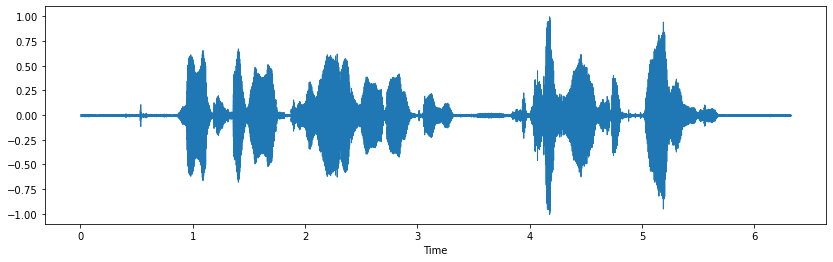

In [32]:
file_name='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)

x = noise(audio_data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)

ipd.Audio(x, rate=sampling_rate)

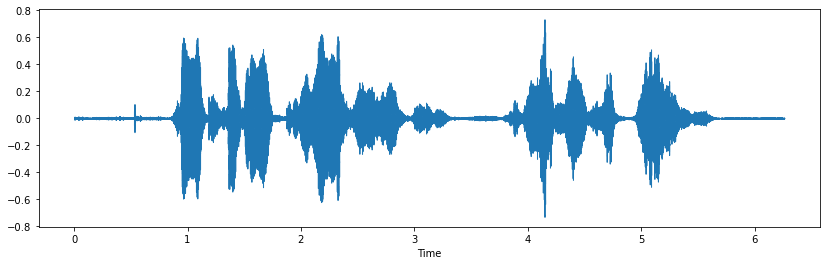

In [33]:
file_name='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)

x = speed_random(audio_data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)

ipd.Audio(x, rate=sampling_rate)

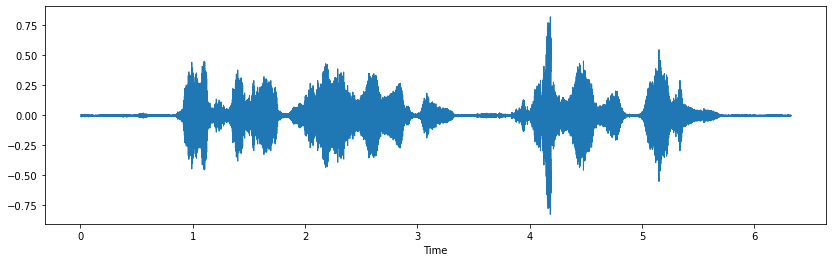

In [34]:
file_name='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'



audio_data, sampling_rate = librosa.load(file_name)

x = pitch(audio_data, sampling_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)

ipd.Audio(x, rate=sampling_rate)

In [35]:
file_name='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'



# augmentation(file_name)

In [36]:
# X_test_df["chopped_paths"].apply(lambda x: copier(x))

##Commented out as not to affect future runs


1302     None
736      None
10359    None
4625     None
13818    None
         ... 
2753     None
12293    None
14739    None
13872    None
6692     None
Name: chopped_paths, Length: 4209, dtype: object

In [37]:
# X_train_df["chopped_paths"].apply(lambda x: augmentation(x))

##Commented out as not to affect future runs


6840     None
10144    None
7592     None
2412     None
9707     None
         ... 
11284    None
11964    None
5390     None
860      None
15795    None
Name: chopped_paths, Length: 12624, dtype: object

## Augmenting the Data to account for variablity of human voice and recording equipment

Will augment raw files and save as new randomized files in new directory_1

Will get spectrograms and save in new directory_2

Then will do Time and Frequency Masking and get finalized spectrograms and save in new directory_3

Next we need to augment our data in order to prevent over-fitting and make our model more generalizable.
We will do this by injecting noise, slowing the sound clips, speeding up the sound clips, and 

We will then extract features, trim the data, extract features without augmentation, add noise a and vertically stack (essentially stacking an array and turning into a matrix which we will then convert to our spectrogram, then add stretch vert stack, and pitch v stack )

In [42]:
pathway = 'aug_train_wavs/'
pathway_to_files = os.listdir(pathway) 


train_paths = []

for file in pathway_to_files:
    if file.startswith('.'):
        pass
    else:
        train_paths.append(pathway + file)
    
        
len(train_paths)

12624

In [43]:
train_aug = pd.DataFrame(train_paths, columns = {"train_paths"} )
train_aug

,train_paths
0,aug_train_wavs/bea_sleepy_00027_chopped0.wav
1,aug_train_wavs/josh_sleepy00005_chopped2.wav
2,aug_train_wavs/jenie_sleepy_00157_chopped0.wav
3,aug_train_wavs/bea_neutral_00062_chopped2.wav
4,aug_train_wavs/bea_sleepy_00072_chopped0.wav
...,...
12619,aug_train_wavs/josh_sleepy00088_chopped4.wav
12620,aug_train_wavs/bea_sleepy_00014_chopped0.wav
12621,aug_train_wavs/josh_sleepy00036_chopped2.wav
12622,aug_train_wavs/sam_sleepy_00386_chopped0.wav


In [44]:
pathway = 'test_wavs/'
pathway_to_files = os.listdir(pathway) 


test_paths = []

for file in pathway_to_files:
    if file.startswith('.'):
        pass
    else:
        test_paths.append(pathway + file)
    
        
len(test_paths)

4209

In [69]:
test_no_aug = pd.DataFrame(test_paths, columns = {"test_paths"} )
test_no_aug

,test_paths
0,test_wavs/sam_neutral_00400_chopped0.wav
1,test_wavs/bea_amused_00289_chopped0.wav
2,test_wavs/jenie_neutral_00189_chopped0.wav
3,test_wavs/bea_amused_00276_chopped0.wav
4,test_wavs/jenie_neutral_00123_chopped0.wav
...,...
4204,test_wavs/bea_neutral_00004_chopped2.wav
4205,test_wavs/sam_neutral_00433_chopped0.wav
4206,test_wavs/jenie_sleepy_00164_chopped0.wav
4207,test_wavs/sam_amused_00128_chopped0.wav


# We Have not lost any data! (I know thats the bare minimum but this is the first time this has worked for me after a week)

In [67]:
def spectrogrammer(path, new_folder_name):
    os.path.basename(path)
    path_stripped = os.path.basename(path).strip(".wav")
    
    audio_data, sampling_rate = librosa.load(path)
    
    spectro = librosa.feature.melspectrogram(audio_data)
    
    s_db = librosa.amplitude_to_db(spectro)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    new_s = librosa.display.specshow(s_db, sr=sampling_rate, ax=ax)
    
    
#     fig.colorbar(new_s, ax=ax) # good for single analysis but will get confused in CNN 
  
    new_path = (new_folder_name + '/' + path_stripped +'.png')
    plt.savefig(new_path)
    return

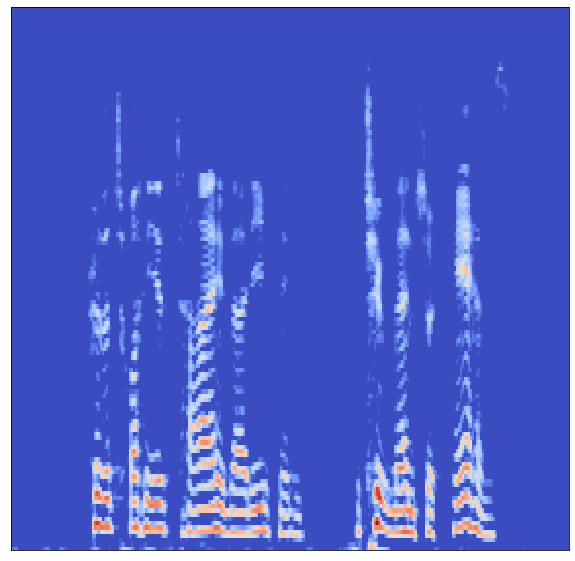

In [68]:
og_path ='EmoV-DB_sorted/sam/Amused/sam_amused_00003.wav'

# spectrogrammer(og_path, "test_spectro")

##Commented out as not to affect future runs


In [1]:
# test_no_aug["test_paths"].apply(lambda x: spectrogrammer(x,"test_spectro"))

##Commented out as not to affect future runs


In [71]:
pathway = 'test_spectro/'
pathway_to_files = os.listdir(pathway) 


test_spectro_list = []

for file in pathway_to_files:
    if file.startswith('.'):
        pass
    else:
        test_spectro_list.append(pathway + file)
    
        
len(test_spectro_list)

4209

In [2]:
# train_aug["train_paths"].apply(lambda x: spectrogrammer(x,"train_spectro"))

##Commented out as not to affect future runs


In [73]:
pathway = 'train_spectro/'
pathway_to_files = os.listdir(pathway) 


train_spectro_list = []

for file in pathway_to_files:
    if file.startswith('.'):
        pass
    else:
        train_spectro_list.append(pathway + file)
    
        
len(train_spectro_list)

12624

Will now do some quick manual sorting to get each spectrum into a proper emotion folder. I would do this with python but I have lost data doing it with python before and I want to be sure I keep all my available data. I will also manually remove the occasional waveform that look empty from the preview shown when organizing data.
These will then be uploaded to Google Drive again for use with my baseline and 1st model CNNs.

# Baseline Model

This took probably way too many attempts to run because Keras Hates me

In [ ]:


classes = [	"amused", "angry", "disgusted", "neutral", "sleepy"]


traingen = ImageDataGenerator(rescale=1/255, validation_split=0.10)
testgen = ImageDataGenerator(rescale=1/255)


train_data = traingen.flow_from_directory(
    directory='img/no_aug_train/',
    target_size=(64, 64),
    classes = classes,
    class_mode='categorical',
    subset = "training",
    seed = 42
)
val_data = traingen.flow_from_directory(
    directory='img/no_aug_train/',
    target_size=(64, 64),
    classes = classes,
    class_mode='categorical',
    subset = "validation",
    seed = 42
    )    
    
    
test_data = testgen.flow_from_directory(
    directory='img/no_aug_test',
    target_size=(64, 64),
    classes = classes,
    class_mode='categorical',
    seed = 42
)


baseline = tf.keras.models.Sequential()
baseline.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
baseline.add(tf.keras.layers.Flatten())
baseline.add(tf.keras.layers.Dense(5, activation='softmax'))

baseline.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
baseline.summary()
baseline.fit(x=train_data, validation_data=val_data, epochs=1)



# First Basic Model

We will add an additional Conv2d Layer and a Max Pooling layer as well as more filters to the originsl Conv2d Layer

In [ ]:
classes = [	"amused", "angry", "disgusted", "neutral", "sleepy"]


traingen = ImageDataGenerator(rescale=1/255, validation_split=0.10)
testgen = ImageDataGenerator(rescale=1/255)


train_data = traingen.flow_from_directory(
    directory='img/no_aug_train/',
    target_size=(64, 64),
    classes = classes,
    class_mode='categorical',
    subset = "training",
    seed = 42
)
val_data = traingen.flow_from_directory(
    directory='img/no_aug_train/',
    target_size=(64, 64),
    classes = classes,
    class_mode='categorical',
    subset = "validation",
    seed = 42
    )    
    
    
test_data = testgen.flow_from_directory(
    directory='img/no_aug_test',
    target_size=(64, 64),
    classes = classes,
    class_mode='categorical',
    seed = 42
)


model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Conv2D(filters=70, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model_1.add(tf.keras.layers.Conv2D(filters=35, kernel_size=3, activation='relu'))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(5, activation='softmax'))
# # model_1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# # model_1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
# model_1.add(tf.keras.layers.Flatten())
# model_1.add(tf.keras.layers.Dense(64, activation='relu'))
# model_1.add(tf.keras.layers.Dense(5, activation='softmax'))





model_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_1.summary()
model_1.fit(x=train_data, validation_data=val_data, epochs=1)



So we have had some improvement but will need to clean up the code, images to add more variation and then add more layers!